In [2]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
Note: you may need to restart the kernel to use updated packages.


In [15]:
# To run the database, make sure MongoDB is installed. 
# In this case, we will not run it as a service. To execute it on Windows, navigate to the following directory:

# C:\Program Files\MongoDB\Server\<version>\bin

# Then, run the following command:

# .\mongod.exe --dbpath C:\path\to\data\db

# If you already have the database path defined, you can omit the --dbpath option when running the command.

# It is recommended to use MongoDB Compass to monitor the database process.


In [22]:
from pymongo import MongoClient

# Connect to MongoDB (using localhost and 27017 port)
client = MongoClient('mongodb://localhost:27017/')

# Creates a database named cursor_analysis
db = client.cursor_analysis

# Creates an initial collection named users
users = db.users



In [23]:
# Inserts a first document in the collection (you must receive an objectId and an acknowledge=True)
users.insert_one({"name": "Juan Dominguez", "age": 30})


InsertOneResult(ObjectId('67c324c5cb799ec48e2a5079'), acknowledged=True)

In [16]:
# Insert multiple documents into the collection
users.insert_many([
    {"name": "Ana Pérez", "age": 25},
    {"name": "Carlos Gómez", "age": 35},
    {"name": "Laura Martín", "age": 40},
    {"name": "Pedro Sánchez", "age": 28},
    {"name": "Lucía Fernández", "age": 31}
])

InsertManyResult([ObjectId('67c1ab34ad0e463c77c17fa5'), ObjectId('67c1ab34ad0e463c77c17fa6'), ObjectId('67c1ab34ad0e463c77c17fa7'), ObjectId('67c1ab34ad0e463c77c17fa8'), ObjectId('67c1ab34ad0e463c77c17fa9')], acknowledged=True)

In [17]:
# Query users with age greater than 30
cursor = users.find({"age": {"$gt": 30}})

In [18]:
# Iterate over the cursor and print each document
for user in cursor:
    print(user)

{'_id': ObjectId('67c1ab34ad0e463c77c17fa6'), 'name': 'Carlos Gómez', 'age': 35}
{'_id': ObjectId('67c1ab34ad0e463c77c17fa7'), 'name': 'Laura Martín', 'age': 40}
{'_id': ObjectId('67c1ab34ad0e463c77c17fa9'), 'name': 'Lucía Fernández', 'age': 31}


In [20]:
# Pagination: Get 2 users per page
cursor = users.find().limit(2)
for user in cursor:
    print(user)

{'_id': ObjectId('67c1a667ad0e463c77c17fa2'), 'name': 'John Doe', 'age': 30}
{'_id': ObjectId('67c1a684ad0e463c77c17fa4'), 'name': 'Juan Dominguez', 'age': 30}


In [21]:
# Create an index on the "age" field to improve query performance
users.create_index([("age", 1)])


'age_1'

In [32]:
# Run the query again after creating the index and explain it with executionStats verbosity

# Query planning details in "queryPlanner" mode
result = users.find({"age": {"$gt": 30}}).explain()

print(result)

{'explainVersion': '1', 'queryPlanner': {'namespace': 'cursor_analysis.users', 'parsedQuery': {'age': {'$gt': 30}}, 'indexFilterSet': False, 'planCacheShapeHash': 'CCB4CABA', 'planCacheKey': 'D1E702AB', 'optimizationTimeMillis': 0, 'maxIndexedOrSolutionsReached': False, 'maxIndexedAndSolutionsReached': False, 'maxScansToExplodeReached': False, 'prunedSimilarIndexes': False, 'winningPlan': {'isCached': False, 'stage': 'FETCH', 'inputStage': {'stage': 'IXSCAN', 'keyPattern': {'age': 1}, 'indexName': 'age_1', 'isMultiKey': False, 'multiKeyPaths': {'age': []}, 'isUnique': False, 'isSparse': False, 'isPartial': False, 'indexVersion': 2, 'direction': 'forward', 'indexBounds': {'age': ['(30, inf.0]']}}}, 'rejectedPlans': []}, 'executionStats': {'executionSuccess': True, 'nReturned': 3, 'executionTimeMillis': 0, 'totalKeysExamined': 3, 'totalDocsExamined': 3, 'executionStages': {'isCached': False, 'stage': 'FETCH', 'nReturned': 3, 'executionTimeMillisEstimate': 0, 'works': 4, 'advanced': 3, 'n

In [ ]:
## We got this json as output:
'''
{
  "explainVersion": "1",
  "queryPlanner": {
    "namespace": "cursor_analysis.users",
    "parsedQuery": {
      "age": {
        "$gt": 30
      }
    },
    "indexFilterSet": false,
    "planCacheShapeHash": "CCB4CABA",
    "planCacheKey": "D1E702AB",
    "optimizationTimeMillis": 0,
    "maxIndexedOrSolutionsReached": false,
    "maxIndexedAndSolutionsReached": false,
    "maxScansToExplodeReached": false,
    "prunedSimilarIndexes": false,
    "winningPlan": {
      "isCached": false,
      "stage": "FETCH",
      "inputStage": {
        "stage": "IXSCAN",
        "keyPattern": {
          "age": 1
        },
        "indexName": "age_1",
        "isMultiKey": false,
        "multiKeyPaths": {
          "age": []
        },
        "isUnique": false,
        "isSparse": false,
        "isPartial": false,
        "indexVersion": 2,
        "direction": "forward",
        "indexBounds": {
          "age": [
            "(30, inf.0]"
          ]
        }
      }
    },
    "rejectedPlans": []
  },
  "executionStats": {
    "executionSuccess": true,
    "nReturned": 3,
    "executionTimeMillis": 0,
    "totalKeysExamined": 3,
    "totalDocsExamined": 3,
    "executionStages": {
      "isCached": false,
      "stage": "FETCH",
      "nReturned": 3,
      "executionTimeMillisEstimate": 0,
      "works": 4,
      "advanced": 3,
      "needTime": 0,
      "needYield": 0,
      "saveState": 0,
      "restoreState": 0,
      "isEOF": 1,
      "docsExamined": 3,
      "alreadyHasObj": 0,
      "inputStage": {
        "stage": "IXSCAN",
        "nReturned": 3,
        "executionTimeMillisEstimate": 0,
        "works": 4,
        "advanced": 3,
        "needTime": 0,
        "needYield": 0,
        "saveState": 0,
        "restoreState": 0,
        "isEOF": 1,
        "keyPattern": {
          "age": 1
        },
        "indexName": "age_1",
        "isMultiKey": false,
        "multiKeyPaths": {
          "age": []
        },
        "isUnique": false,
        "isSparse": false,
        "isPartial": false,
        "indexVersion": 2,
        "direction": "forward",
        "indexBounds": {
          "age": [
            "(30, inf.0]"
          ]
        },
        "keysExamined": 3,
        "seeks": 1,
        "dupsTested": 0,
        "dupsDropped": 0
      }
    },
    "allPlansExecution": []
  },
  "queryShapeHash": "336B1B40D2AFF470BB32DFBD5ABFAB57A3BAAE5FD41EE4E2202053B17DE4F315",
  "command": {
    "find": "users",
    "filter": {
      "age": {
        "$gt": 30
      }
    },
    "$db": "cursor_analysis"
  },
  "serverInfo": {
    "host": "ks16",
    "port": 27017,
    "version": "8.0.4",
    "gitVersion": "bc35ab4305d9920d9d0491c1c9ef9b72383d31f9"
  },
  "serverParameters": {
    "internalQueryFacetBufferSizeBytes": 104857600,
    "internalQueryFacetMaxOutputDocSizeBytes": 104857600,
    "internalLookupStageIntermediateDocumentMaxSizeBytes": 104857600,
    "internalDocumentSourceGroupMaxMemoryBytes": 104857600,
    "internalQueryMaxBlockingSortMemoryUsageBytes": 104857600,
    "internalQueryProhibitBlockingMergeOnMongoS": 0,
    "internalQueryMaxAddToSetBytes": 104857600,
    "internalDocumentSourceSetWindowFieldsMaxMemoryBytes": 104857600,
    "internalQueryFrameworkControl": "trySbeRestricted",
    "internalQueryPlannerIgnoreIndexWithCollationForRegex": 1
  },
  "ok": 1.0
}
'''

# MongoDB Query Execution Analysis

This document provides an analysis of a MongoDB query execution, based on the output from the `explain()` method. The analysis is broken down into key sections: **Query Planner**, **Execution Stats**, and **Execution Stages**.

## 1. Query Planner

The `queryPlanner` section provides details about how MongoDB plans to execute the query.

### - `namespace`
This field shows the collection being queried. In this case, the query is being executed on the `cursor_analysis.users` collection.

### - `parsedQuery`
This field contains the actual query MongoDB is executing. The query is checking for documents where the `age` field is greater than 30.

### - `indexFilterSet`
This field is `false`, indicating that MongoDB did not apply any index filtering. It means MongoDB is free to use the best index available without any restrictions.

### - `winningPlan`
This is the plan MongoDB decided was the most efficient for executing the query. In this case, MongoDB chose to use an **Index Scan (IXSCAN)** over the `age` field. Here’s a breakdown of this plan:
- **IXSCAN (Index Scan)**: This operation is used to efficiently search through the index. By scanning the index, MongoDB avoids having to examine every document in the collection, improving performance.
- **Index Name (`age_1`)**: The index being used is an ascending index on the `age` field.
- **Index Bounds**: MongoDB will only consider documents where the `age` is greater than 30 (`(30, inf.0]`).

## 2. Execution Stats

The `executionStats` section provides insights into how well the query executed.

### - `executionSuccess`
This field is `true`, meaning the query was successfully executed.

### - `nReturned`
This value indicates that 3 documents were returned by the query. This shows the number of documents that matched the query criteria.

### - `executionTimeMillis`
This shows the time taken to execute the query in milliseconds. In this case, the query executed in **0 milliseconds**, indicating that it was highly optimized and very fast.

### - `totalKeysExamined`
This field shows the number of index keys that were examined during the execution. In this case, MongoDB examined **3 keys**, which matches the number of documents returned.

### - `totalDocsExamined`
This value shows the total number of documents that were examined during the query. In this case, **3 documents** were examined. This aligns with the number of documents returned, suggesting the query used the index effectively.

## 3. Execution Stages

The `executionStages` section breaks down the operations MongoDB performed to execute the query.

### - `stage`
The first stage is an `IXSCAN` (Index Scan). This stage performs the search over the index to find the documents that match the query criteria. Since the query checks for `age > 30`, this stage efficiently narrows down the results using the index.

### - `inputStage`
This is the first operation performed, where MongoDB scans the index on the `age` field. The `age_1` index is used, and MongoDB looks for documents where the `age` is greater than 30.

### - `FETCH`
After the index scan, MongoDB performs a `FETCH` operation. The index scan only provides pointers to documents, so the `FETCH` operation is needed to retrieve the actual documents from the collection. This is an efficient operation since only the relevant documents are retrieved.

### - Efficiency Indicators
- **Seeks**: The number of index seeks performed. In this case, there was **1 seek**, which indicates that MongoDB found the required documents in a single pass through the index. This is an efficient outcome.
- **Dups Tested and Dups Dropped**: These values are **0**, meaning no duplicate documents were found during the query execution.

## Conclusion

The MongoDB query execution plan is highly optimized. Here are the key points:
- **Index Use**: MongoDB used an index scan (IXSCAN) over the `age` field to narrow down the documents.
- **Efficient Execution**: The query returned 3 documents in **0 milliseconds**. It examined only 3 index keys and 3 documents, showing minimal overhead.
- **Fetch Operation**: After finding the relevant documents via the index, MongoDB efficiently fetched the actual documents.
- **Execution Efficiency**: The query executed efficiently with no unnecessary overhead, and no duplicates were tested or dropped.

Overall, MongoDB's query planner and execution process ensured that this query was executed in an optimal manner with minimal resource consumption.


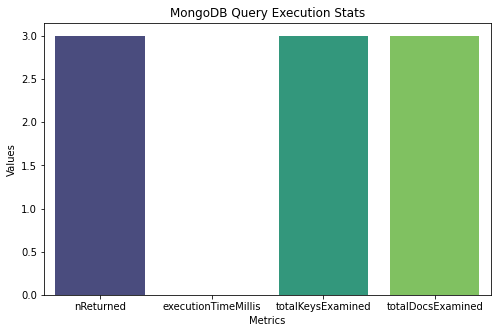

In [14]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Paste the entire explain() output as a raw string (triple quotes for multiline)
explain_text = """
{
  "explainVersion": "1",
  "queryPlanner": {
    "namespace": "cursor_analysis.users",
    "parsedQuery": {
      "age": {
        "$gt": 30
      }
    },
    "indexFilterSet": false,
    "planCacheShapeHash": "CCB4CABA",
    "planCacheKey": "D1E702AB",
    "optimizationTimeMillis": 0,
    "maxIndexedOrSolutionsReached": false,
    "maxIndexedAndSolutionsReached": false,
    "maxScansToExplodeReached": false,
    "prunedSimilarIndexes": false,
    "winningPlan": {
      "isCached": false,
      "stage": "FETCH",
      "inputStage": {
        "stage": "IXSCAN",
        "keyPattern": {
          "age": 1
        },
        "indexName": "age_1",
        "isMultiKey": false,
        "multiKeyPaths": {
          "age": []
        },
        "isUnique": false,
        "isSparse": false,
        "isPartial": false,
        "indexVersion": 2,
        "direction": "forward",
        "indexBounds": {
          "age": [
            "(30, inf.0]"
          ]
        }
      }
    },
    "rejectedPlans": []
  },
  "executionStats": {
    "executionSuccess": true,
    "nReturned": 3,
    "executionTimeMillis": 0,
    "totalKeysExamined": 3,
    "totalDocsExamined": 3,
    "executionStages": {
      "isCached": false,
      "stage": "FETCH",
      "nReturned": 3,
      "executionTimeMillisEstimate": 0,
      "works": 4,
      "advanced": 3,
      "needTime": 0,
      "needYield": 0,
      "saveState": 0,
      "restoreState": 0,
      "isEOF": 1,
      "docsExamined": 3,
      "alreadyHasObj": 0,
      "inputStage": {
        "stage": "IXSCAN",
        "nReturned": 3,
        "executionTimeMillisEstimate": 0,
        "works": 4,
        "advanced": 3,
        "needTime": 0,
        "needYield": 0,
        "saveState": 0,
        "restoreState": 0,
        "isEOF": 1,
        "keyPattern": {
          "age": 1
        },
        "indexName": "age_1",
        "isMultiKey": false,
        "multiKeyPaths": {
          "age": []
        },
        "isUnique": false,
        "isSparse": false,
        "isPartial": false,
        "indexVersion": 2,
        "direction": "forward",
        "indexBounds": {
          "age": [
            "(30, inf.0]"
          ]
        },
        "keysExamined": 3,
        "seeks": 1,
        "dupsTested": 0,
        "dupsDropped": 0
      }
    },
    "allPlansExecution": []
  },
  "queryShapeHash": "336B1B40D2AFF470BB32DFBD5ABFAB57A3BAAE5FD41EE4E2202053B17DE4F315",
  "command": {
    "find": "users",
    "filter": {
      "age": {
        "$gt": 30
      }
    },
    "$db": "cursor_analysis"
  },
  "serverInfo": {
    "host": "ks16",
    "port": 27017,
    "version": "8.0.4",
    "gitVersion": "bc35ab4305d9920d9d0491c1c9ef9b72383d31f9"
  },
  "serverParameters": {
    "internalQueryFacetBufferSizeBytes": 104857600,
    "internalQueryFacetMaxOutputDocSizeBytes": 104857600,
    "internalLookupStageIntermediateDocumentMaxSizeBytes": 104857600,
    "internalDocumentSourceGroupMaxMemoryBytes": 104857600,
    "internalQueryMaxBlockingSortMemoryUsageBytes": 104857600,
    "internalQueryProhibitBlockingMergeOnMongoS": 0,
    "internalQueryMaxAddToSetBytes": 104857600,
    "internalDocumentSourceSetWindowFieldsMaxMemoryBytes": 104857600,
    "internalQueryFrameworkControl": "trySbeRestricted",
    "internalQueryPlannerIgnoreIndexWithCollationForRegex": 1
  },
  "ok": 1.0
}

"""

# Load the string as JSON
explain_data = json.loads(explain_text)

# Extract the stats
execution_stats = explain_data.get("executionStats", {})
metrics = ["nReturned", "executionTimeMillis", "totalKeysExamined", "totalDocsExamined"]
values = [execution_stats.get(metric, 0) for metric in metrics]

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis", hue=metrics)

plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("MongoDB Query Execution Stats")

plt.show()


In [24]:
pipeline = [
    {
        "$match": {
            "$and": [
                {"age": {"$gt": 30}},
                {"name": {"$in": ["John", "Jane", "Alice"]}},
                {"location": {"$in": ["New York", "Los Angeles", "San Francisco"]}}
            ]
        }
    },
    {
        "$sort": {"age": 1}  # Sort by age (ascending)
    },
    {
        "$group": {
            "_id": "$location",  # Group by location
            "count": {"$sum": 1}  # Count users in each location
        }
    },
    {
        "$project": {
            "_id": 0,  # Exclude the _id field from the result
            "location": "$_id",
            "count": 1  # Include the count field
        }
    }
]

# Execute the aggregation query
results = users.aggregate(pipeline)

# Print the results
for result in results:
    print(result)

In [33]:
# Execute the explain on the aggregation pipeline
explain_result = db.command("aggregate", "users", pipeline=pipeline, explain=True)

# Print the explain result
print(explain_result)

{'explainVersion': '2', 'stages': [{'$cursor': {'queryPlanner': {'namespace': 'cursor_analysis.users', 'parsedQuery': {'$and': [{'age': {'$gt': 30}}, {'location': {'$in': ['Los Angeles', 'New York', 'San Francisco']}}, {'name': {'$in': ['Alice', 'Jane', 'John']}}]}, 'indexFilterSet': False, 'planCacheShapeHash': 'D0C21424', 'planCacheKey': '55EDAFB1', 'optimizationTimeMillis': 0, 'maxIndexedOrSolutionsReached': False, 'maxIndexedAndSolutionsReached': False, 'maxScansToExplodeReached': False, 'prunedSimilarIndexes': False, 'winningPlan': {'isCached': False, 'queryPlan': {'stage': 'GROUP', 'planNodeId': 4, 'inputStage': {'stage': 'FETCH', 'planNodeId': 2, 'filter': {'$and': [{'location': {'$in': ['Los Angeles', 'New York', 'San Francisco']}}, {'name': {'$in': ['Alice', 'Jane', 'John']}}]}, 'inputStage': {'stage': 'IXSCAN', 'planNodeId': 1, 'keyPattern': {'age': 1}, 'indexName': 'age_1', 'isMultiKey': False, 'multiKeyPaths': {'age': []}, 'isUnique': False, 'isSparse': False, 'isPartial': 

In [ ]:
## We got this json as output:
'''
{
  "explainVersion": "2",
  "stages": [
    {
      "$cursor": {
        "queryPlanner": {
          "namespace": "cursor_analysis.users",
          "parsedQuery": {
            "$and": [
              { "age": { "$gt": 30 } },
              { "location": { "$in": ["Los Angeles", "New York", "San Francisco"] } },
              { "name": { "$in": ["Alice", "Jane", "John"] } }
            ]
          },
          "indexFilterSet": false,
          "planCacheShapeHash": "D0C21424",
          "planCacheKey": "55EDAFB1",
          "optimizationTimeMillis": 0,
          "maxIndexedOrSolutionsReached": false,
          "maxIndexedAndSolutionsReached": false,
          "maxScansToExplodeReached": false,
          "prunedSimilarIndexes": false,
          "winningPlan": {
            "isCached": false,
            "queryPlan": {
              "stage": "GROUP",
              "planNodeId": 4,
              "inputStage": {
                "stage": "FETCH",
                "planNodeId": 2,
                "filter": {
                  "$and": [
                    { "location": { "$in": ["Los Angeles", "New York", "San Francisco"] } },
                    { "name": { "$in": ["Alice", "Jane", "John"] } }
                  ]
                },
                "inputStage": {
                  "stage": "IXSCAN",
                  "planNodeId": 1,
                  "keyPattern": { "age": 1 },
                  "indexName": "age_1",
                  "isMultiKey": false,
                  "multiKeyPaths": { "age": [] },
                  "isUnique": false,
                  "isSparse": false,
                  "isPartial": false,
                  "indexVersion": 2,
                  "direction": "forward",
                  "indexBounds": {
                    "age": ["(30, inf.0]"]
                  }
                }
              }
            }
          },
          "slotBasedPlan": {
            "slots": "$$RESULT=s18 env: { s1 = KS(2B3CFE04), s2 = KS(33FFFFFFFFFFFFFFFFFE04), s7 = {\"age\" : 1}, s12 = InList(\"New York\" \"Los Angeles\" \"San Francisco\"), s13 = InList(\"John\" \"Jane\" \"Alice\") }",
            "stages": "[4] project [s18 = newObj(\"_id\", s15, \"count\", s17)] \n[4] project [s17 = (convert ( s16, int32) ?: s16)] \n[4] group [s15] [s16 = count()] spillSlots[s14] mergingExprs[sum(s14)] \n[4] project [s15 = (s10 ?: null)] \n[2] filter {(traverseF(s10, lambda(l3.0) { isMember(move(l3.0), s12) }, false) && traverseF(s11, lambda(l4.0) { isMember(move(l4.0), s13) }, false))} \n[2] nlj inner [] [s3, s4, s5, s6, s7] \n    left \n        [1] cfilter {(exists(s1) && exists(s2))} \n        [1] ixseek s1 s2 s6 s3 s4 s5 [] @\"0b4db3d3-a357-4126-9617-0cea7c32710b\" @\"age_1\" true \n    right \n        [2] limit 1ll \n        [2] seek s3 s8 s9 s4 s5 s6 s7 none none [s10 = location, s11 = name] @\"0b4db3d3-a357-4126-9617-0cea7c32710b\" true false"
          }
        },
        "rejectedPlans": []
      }
    },
    {
      "$project": {
        "count": true,
        "location": "$_id",
        "_id": false
      }
    }
  ],
  "queryShapeHash": "82D7D219AFA86C618330485630D8B3F3E63DE50725B8E542EABAEF062866EB20",
  "serverInfo": {
    "host": "ks16",
    "port": 27017,
    "version": "8.0.4",
    "gitVersion": "bc35ab4305d9920d9d0491c1c9ef9b72383d31f9"
  },
  "serverParameters": {
    "internalQueryFacetBufferSizeBytes": 104857600,
    "internalQueryFacetMaxOutputDocSizeBytes": 104857600,
    "internalLookupStageIntermediateDocumentMaxSizeBytes": 104857600,
    "internalDocumentSourceGroupMaxMemoryBytes": 104857600,
    "internalQueryMaxBlockingSortMemoryUsageBytes": 104857600,
    "internalQueryProhibitBlockingMergeOnMongoS": 0,
    "internalQueryMaxAddToSetBytes": 104857600,
    "internalDocumentSourceSetWindowFieldsMaxMemoryBytes": 104857600,
    "internalQueryFrameworkControl": "trySbeRestricted",
    "internalQueryPlannerIgnoreIndexWithCollationForRegex": 1
  },
  "command": {
    "aggregate": "users",
    "pipeline": [
      {
        "$match": {
          "$and": [
            { "age": { "$gt": 30 } },
            { "name": { "$in": ["John", "Jane", "Alice"] } },
            { "location": { "$in": ["New York", "Los Angeles", "San Francisco"] } }
          ]
        }
      },
      { "$sort": { "age": 1 } },
      {
        "$group": {
          "_id": "$location",
          "count": { "$sum": 1 }
        }
      },
      {
        "$project": {
          "_id": 0,
          "location": "$_id",
          "count": 1
        }
      }
    ],
    "explain": true,
    "lsid": { "id": { "$binary": "21\x16\xf0\\f\x96G5\x8e\x0c\x84(\x85\x89;\xc6", "subType": "04" } },
    "$db": "cursor_analysis"
  },
  "ok": 1.0
}

'''

In [38]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Paste the entire explain() output as a raw string (triple quotes for multiline)
explain_text = """
{
  "explainVersion": "2",
  "stages": [
    {
      "$cursor": {
        "queryPlanner": {
          "namespace": "cursor_analysis.users",
          "parsedQuery": {
            "$and": [
              { "age": { "$gt": 30 } },
              { "location": { "$in": ["Los Angeles", "New York", "San Francisco"] } },
              { "name": { "$in": ["Alice", "Jane", "John"] } }
            ]
          },
          "indexFilterSet": false,
          "planCacheShapeHash": "D0C21424",
          "planCacheKey": "55EDAFB1",
          "optimizationTimeMillis": 0,
          "maxIndexedOrSolutionsReached": false,
          "maxIndexedAndSolutionsReached": false,
          "maxScansToExplodeReached": false,
          "prunedSimilarIndexes": false,
          "winningPlan": {
            "isCached": false,
            "queryPlan": {
              "stage": "GROUP",
              "planNodeId": 4,
              "inputStage": {
                "stage": "FETCH",
                "planNodeId": 2,
                "filter": {
                  "$and": [
                    { "location": { "$in": ["Los Angeles", "New York", "San Francisco"] } },
                    { "name": { "$in": ["Alice", "Jane", "John"] } }
                  ]
                },
                "inputStage": {
                  "stage": "IXSCAN",
                  "planNodeId": 1,
                  "keyPattern": { "age": 1 },
                  "indexName": "age_1",
                  "isMultiKey": false,
                  "multiKeyPaths": { "age": [] },
                  "isUnique": false,
                  "isSparse": false,
                  "isPartial": false,
                  "indexVersion": 2,
                  "direction": "forward",
                  "indexBounds": {
                    "age": ["(30, inf.0]"]
                  }
                }
              }
            }
          }
        }
      }
    },
    {
      "$project": {
        "count": true,
        "location": "$_id",
        "_id": false
      }
    }
  ],
  "queryShapeHash": "82D7D219AFA86C618330485630D8B3F3E63DE50725B8E542EABAEF062866EB20",
  "serverInfo": {
    "host": "ks16",
    "port": 27017,
    "version": "8.0.4",
    "gitVersion": "bc35ab4305d9920d9d0491c1c9ef9b72383d31f9"
  },
  "serverParameters": {
    "internalQueryFacetBufferSizeBytes": 104857600,
    "internalQueryFacetMaxOutputDocSizeBytes": 104857600,
    "internalLookupStageIntermediateDocumentMaxSizeBytes": 104857600,
    "internalDocumentSourceGroupMaxMemoryBytes": 104857600,
    "internalQueryMaxBlockingSortMemoryUsageBytes": 104857600,
    "internalQueryProhibitBlockingMergeOnMongoS": 0,
    "internalQueryMaxAddToSetBytes": 104857600,
    "internalDocumentSourceSetWindowFieldsMaxMemoryBytes": 104857600,
    "internalQueryFrameworkControl": "trySbeRestricted",
    "internalQueryPlannerIgnoreIndexWithCollationForRegex": 1
  },
  "command": {
    "aggregate": "users",
    "pipeline": [
      {
        "$match": {
          "$and": [
            { "age": { "$gt": 30 } },
            { "name": { "$in": ["John", "Jane", "Alice"] } },
            { "location": { "$in": ["New York", "Los Angeles", "San Francisco"] } }
          ]
        }
      },
      { "$sort": { "age": 1 } },
      {
        "$group": {
          "_id": "$location",
          "count": { "$sum": 1 }
        }
      },
      {
        "$project": {
          "_id": 0,
          "location": "$_id",
          "count": 1
        }
      }
    ],
    "explain": true,
    "lsid": { 
      "id": { 
        "$binary": {
          "base64": "ITYW9pYnYzYz0Vfb7b...",
          "subType": "04"
        }
      }
    },
    "$db": "cursor_analysis"
  },
  "ok": 1.0
}
"""

# Load the string as JSON
explain_data = json.loads(explain_text)

# Extract the execution stats if available
execution_stats = explain_data.get("executionStats", {})

# Metrics we want to extract
metrics = ["nReturned", "executionTimeMillis", "totalKeysExamined", "totalDocsExamined"]

# Get values for the metrics or default to 0 if not available
values = [execution_stats.get(metric, 0) for metric in metrics]

# Plot the data if execution stats are available
if execution_stats:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=metrics, y=values, palette="viridis", hue=metrics)

    plt.xlabel("Metrics")
    plt.ylabel("Values")
    plt.title("MongoDB Query Execution Stats")

    plt.show()
else:
    print("No execution stats found in explain output.")


No execution stats found in explain output.
